In [2]:
from pprint import pprint
import json 
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
path = "/home/pathin/tmp_llm/Trust-Medical-LVLM/data/data/physionet.org/files/mimic-cxr-jpg/2.0.0/mimic-fatuality.json"
with open(path, "r") as pf:
    data = json.load(pf)

In [6]:
df = pd.DataFrame(data)
df.head()

,id,study_id,subject_id,split,gender,age,race,answer,question_id,text,image
0,abea5eb9-b7c32823-3a14c5ca-77868030-69c83139,50051329,10046166,test,M,68,Caucasian,Reduced lung volume on a chest X-ray image can...,0,What might be the reason for a lower than expe...,p10/p10046166/s50051329/abea5eb9-b7c32823-3a14...
1,abea5eb9-b7c32823-3a14c5ca-77868030-69c83139,50051329,10046166,test,M,68,Caucasian,"A calcified granuloma in the lung, as seen on ...",1,What is the significance of identifying a calc...,p10/p10046166/s50051329/abea5eb9-b7c32823-3a14...
2,abea5eb9-b7c32823-3a14c5ca-77868030-69c83139,50051329,10046166,test,M,68,Caucasian,The absence of airspace consolidation on a che...,2,"In the absence of airspace consolidation, what...",p10/p10046166/s50051329/abea5eb9-b7c32823-3a14...
3,abea5eb9-b7c32823-3a14c5ca-77868030-69c83139,50051329,10046166,test,M,68,Caucasian,The presence of surgical clips and vascular ma...,3,How can the presence of surgical clips and vas...,p10/p10046166/s50051329/abea5eb9-b7c32823-3a14...
4,abea5eb9-b7c32823-3a14c5ca-77868030-69c83139,50051329,10046166,test,M,68,Caucasian,The lack of pleural effusion or pulmonary edem...,4,What does the lack of pleural effusion or pulm...,p10/p10046166/s50051329/abea5eb9-b7c32823-3a14...


---
### Simple Stats.

In [8]:
df.size

113971

In [5]:
df.columns

Index(['id', 'study_id', 'subject_id', 'split', 'gender', 'age', 'race',
       'answer', 'question_id', 'text', 'image'],
      dtype='object')

In [6]:
df.iloc[:, 1:].nunique()

study_id        1511
subject_id       273
split              1
gender             2
age               62
race               6
answer         10106
question_id    10361
text            9842
image           1936
dtype: int64

---
### Demographic stats.

In [7]:
df['split'].unique()

array(['test'], dtype=object)

In [8]:
df['gender'].unique()

array(['M', 'F'], dtype=object)

In [61]:
df.groupby('gender')['question_id'].count()/10361

gender
F    0.444938
M    0.555062
Name: question_id, dtype: float64

124332

<Axes: ylabel='subject_id'>

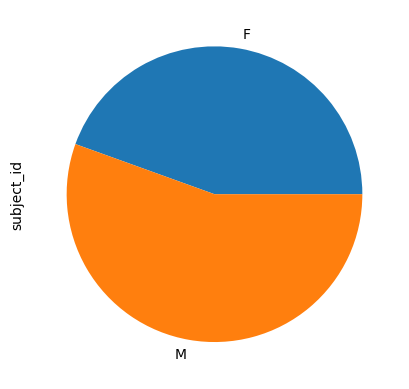

In [52]:
df.groupby('gender')['subject_id'].count().plot.pie(y='gender')

In [10]:
str(sorted(df['age'].unique()))

'[np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(44), np.int64(46), np.int64(47), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.int64(71), np.int64(72), np.int64(73), np.int64(74), np.int64(75), np.int64(76), np.int64(77), np.int64(78), np.int64(79), np.int64(80), np.int64(81), np.int64(82), np.int64(83), np.int64(84), np.int64(85), np.int64(86), np.int64(87), np.int64(88), np.int64(89), np.int64(90), np.int64(91), np.int64(92), np.int64(93), np.int64(94), np.int64(95), np.int64(96), np.int64(97), np.int64(98)]'

Text(0.5, 1.0, 'Histogram of Age')

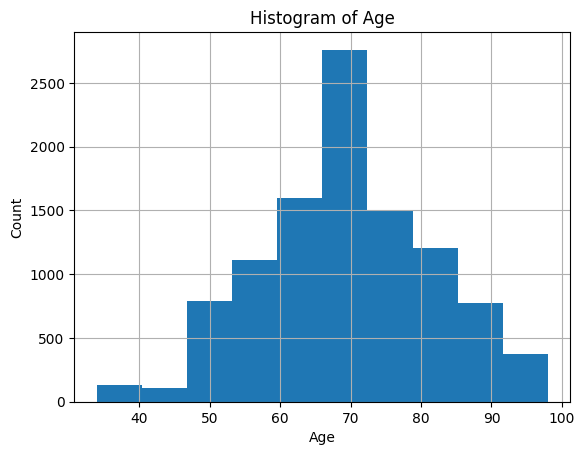

In [14]:
df['age'].hist()
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Histogram of Age')

In [15]:
df['race'].unique()

array(['Caucasian', 'African American', 'Hispanic', 'Native American',
       'Unknown', 'Asian'], dtype=object)

In [19]:
race_df = df.groupby('race')['subject_id'].count().reset_index()
race_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   race        6 non-null      object
 1   subject_id  6 non-null      int64 
dtypes: int64(1), object(1)
memory usage: 224.0+ bytes


Text(0, 0.5, 'count')

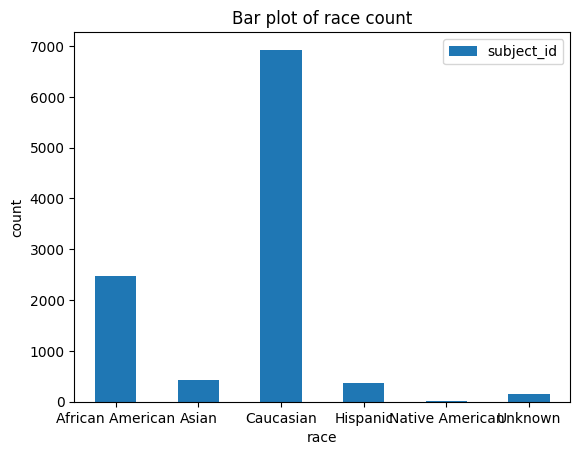

In [21]:
arace_df = df.groupby('race')['subject_id'].count().reset_index()
race_df.plot.bar(x='race', y='subject_id', rot=0)
plt.title('Bar plot of race count')
plt.xlabel('race')
plt.ylabel('count')

In [39]:
df['text'].sample(n=5).to_dict()

{5661: 'Is there any evidence of a calcified granuloma in the chest X-ray image?',
 8731: 'What radiographic features might indicate the presence of a cardiac pacemaker, and where is it usually located in the chest X-ray?',
 8355: 'Are there any visual indications of recent trauma to the ribs in the image?',
 5483: '',
 7187: "What does the appearance of the right Pleurx catheter in the image suggest about the patient's condition?"}

In [38]:
df['answer'].sample(n=5).to_dict()

{3587: 'The image would show diffuse haziness in the lung fields and possibly Kerley B lines, indicative of interstitial fluid.',
 918: 'There are no acute findings evident in the chest X-ray image.',
 8809: 'Yes, there is a medical device present; a pacemaker can be seen in the left pectoral region with a single intact lead.',
 6259: 'A mildly enlarged cardiac silhouette on a chest X-ray image would be indicated by an increased width of the heart shadow, which may occupy more than half of the thoracic width, or the heart may appear to extend beyond the rib cage border on the left side.',
 8070: 'Mild interstitial opacification is visible, which could suggest mild vascular congestion or interstitial pulmonary edema.'}

---
### Question related stats.

In [41]:
# empty questions
df.loc[df['text']=="", :].size

44

In [49]:
df['starting_word'] = df['text'].apply(lambda x: x.split(' ')[0])
df['starting_word'].value_counts()

starting_word
What           4320
How            2019
Is             1135
Are             607
Can             573
In              555
Does            363
Based           142
Where           128
When            119
On              109
Has              47
If               39
Describe         30
Upon             20
Which            20
Compared         16
Regarding        15
Why              14
Without          13
From             10
Have              7
Would             7
Aside             6
Apart             6
Do                6
Considering       4
Given             4
Besides           4
                  4
According         4
Despite           3
With              3
Could             2
To                2
After             1
Although          1
What,             1
Beyond            1
Comparing         1
Name: count, dtype: int64

In [43]:
# question starts from "is" or "are" 
df[df['text'].str.contains(r'^(is|are)\b', case=False, na=False)].size/df.size

C:\Users\nipun_qk4hy9e\AppData\Local\Temp\ipykernel_9908\2157006965.py:2: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df[df['text'].str.contains(r'^(is|are)\b', case=False, na=False)].size/df.size


0.16813048933500627

In [45]:
# questions starts from "can"
df[df['text'].str.contains(r'^can\b', case=False, na=False)].size/df.size

0.055303542129138114

In [41]:
# questions starts from "what"
df[df['text'].str.contains(r'^what\b', case=False, na=False)].size/df.size

0.4170446868062928

In [44]:
# questions starts from "how"
df[df['text'].str.contains(r'^how\b', case=False, na=False)].size/df.size

0.19486536048643954

In [24]:
qa_df = df.loc[:, ['text', 'answer']]
qa_df.head()

,text,answer
0,What might be the reason for a lower than expe...,Reduced lung volume on a chest X-ray image can...
1,What is the significance of identifying a calc...,"A calcified granuloma in the lung, as seen on ..."
2,"In the absence of airspace consolidation, what...",The absence of airspace consolidation on a che...
3,How can the presence of surgical clips and vas...,The presence of surgical clips and vascular ma...
4,What does the lack of pleural effusion or pulm...,The lack of pleural effusion or pulmonary edem...


In [25]:
# temp. save for manual inspection
qa_df.to_csv("../datasets/mimic_qa_data.csv", index=0)

#### is/are question analysis

In [31]:
qa_ia_df = df.loc[df['text'].str.contains(r'^(is|are)\b', case=False, na=False), ['text', 'answer']]
qa_ia_df.head()

C:\Users\nipun_qk4hy9e\AppData\Local\Temp\ipykernel_9908\3900708571.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  qa_ia_df = df.loc[df['text'].str.contains(r'^(is|are)\b', case=False, na=False), ['text', 'answer']]


,text,answer
14,"Is there any evidence of pleural effusion, pne...","There is no evidence of pleural effusion, pneu..."
18,Are there any signs of acute infection or inju...,No definite signs of acute infection or injury...
31,Is there any evidence of a medical device with...,"Yes, the image shows the presence of a tracheo..."
36,Are there any signs of lung infiltrates or ple...,No definite infiltrates or pleural effusion ar...
50,Is there any evidence of a retrocardiac opacit...,"Yes, there is a notable opacity behind the lef..."


In [39]:
pprint(qa_ia_df.sample(5).to_dict('records'))

[{'answer': 'The image does not show any pleural effusion.',
  'text': 'Is there any indication of excess fluid in the pleural spaces, '
          'known as pleural effusion?'},
 {'answer': 'There are no signs of pleural effusion or pneumothorax on the '
            'chest X-ray.',
  'text': 'Are there signs of pleural effusion or pneumothorax on the chest '
          'X-ray?'},
 {'answer': 'No new areas of focal consolidation are identified in the lungs.',
  'text': 'Are there any new focal abnormalities identified in the lungs?'},
 {'answer': 'Yes, the image shows marked kyphosis of the spine.',
  'text': "Is there any indication of structural changes to the patient's "
          'spine as seen in the image?'},
 {'answer': 'No, there is no evidence of pleural effusion or pneumothorax '
            'detected in the image.',
  'text': 'Is there any indication of pleural effusion or pneumothorax in this '
          'patient?'}]
